In [1]:
from mybatch import *
import numpy as np
import seaborn
from matplotlib import pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook as tqn
from dataset import Dataset, DatasetIndex

# train linear regression

Widget Javascript not detected.  It may not be installed or enabled properly.


loss:  4.12379


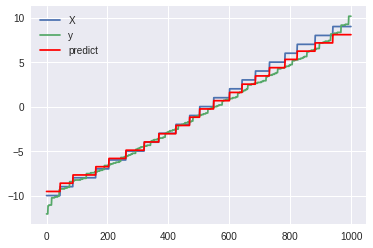

loss:  3.26735


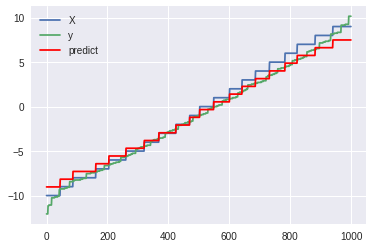

loss:  2.93499


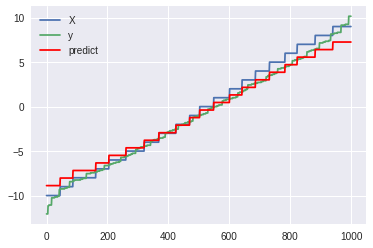

loss:  2.0056


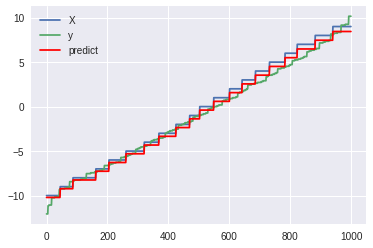

loss:  3.2484


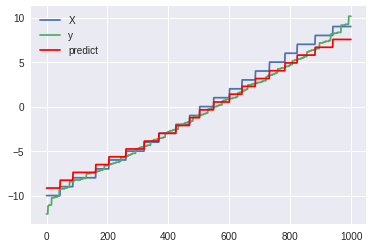

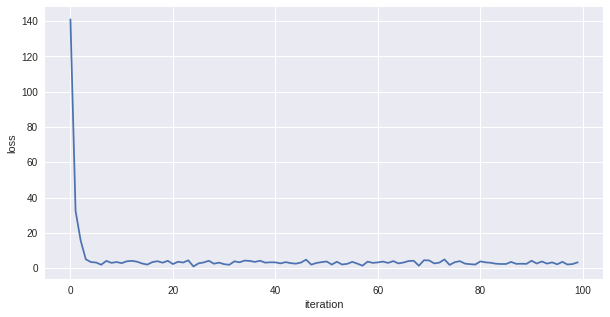

In [2]:
len_data = 1000
ix = DatasetIndex(np.arange(len_data))

dset = Dataset(ix,MyBatch)
sess = tf.Session()
sess.run(tf.global_variables_initializer())
i = 0
x, y = generate(len_data, 'linear')
loss = []
dict_params = {'w': np.zeros(1, dtype=np.float32),
               'b': np.zeros(1, dtype=np.float32),
               'loss':np.zeros(1, dtype=np.float32)}

for batch in tqn(dset.gen_batch(10, n_epochs=1)):
   # print(i.indices)
    batch.load((x, y)).train_linear_model(sess, dict_params)
    i += 1
    loss.append(dict_params['loss'])
    if i == 20:
        print('loss: ', dict_params['loss'])
        i = 0
        plt.plot(sorted(x), label='X')
        plt.plot(sorted(y), label='y')
        plt.plot( sorted(dict_params['w'] * x) + dict_params['b'], c ='r', label='predict')
        plt.legend()
        plt.show()
plt.figure(figsize=(10, 5))
plt.plot(loss)
plt.xlabel('iteration')
plt.ylabel('loss')

# train logistic regression

Widget Javascript not detected.  It may not be installed or enabled properly.



test:  [-100    5   -1   -1   -1    5] 
 predict:  [0, 1, 0, 0, 0, 1] 



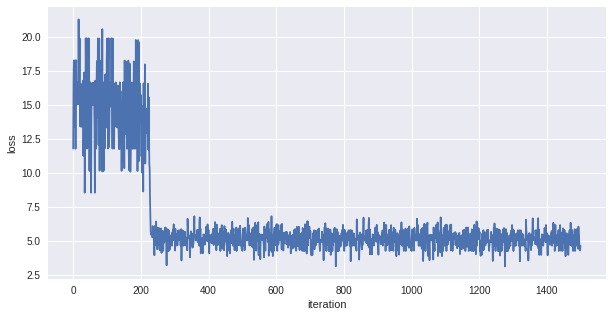

In [3]:
len_data = 5000
ix = DatasetIndex(np.arange(len_data))

dset = Dataset(ix, MyBatch)
sess = tf.Session()
sess.run(tf.global_variables_initializer())
i = 0
x, y = generate(len_data, 'logistic')

dict_params = {'w': np.zeros(1),
              'b': np.zeros(1),
              'loss': np.zeros(1),
              'test': np.array([-100, 5, -1, -1, -1, 5]),
              'result': np.zeros(6, dtype=np.float32)}
loss = []
for batch in tqn(dset.gen_batch(10, n_epochs=3)):
    batch.load((x, y)).train_logistic_model(sess, dict_params)
    loss.append(dict_params['loss'])

result = [0 if i < 0.5 else 1 for i in dict_params['result']]
print('test: ', dict_params['test'], '\n', 'predict: ', result, '\n')
plt.figure(figsize=(10, 5))
plt.plot(loss)
plt.xlabel('iteration')
plt.ylabel('loss')

# train poisson regression

Widget Javascript not detected.  It may not be installed or enabled properly.



predict lam: [ 0.59977609]
true lam: [ 0.45713568  0.47822166  0.34477031]


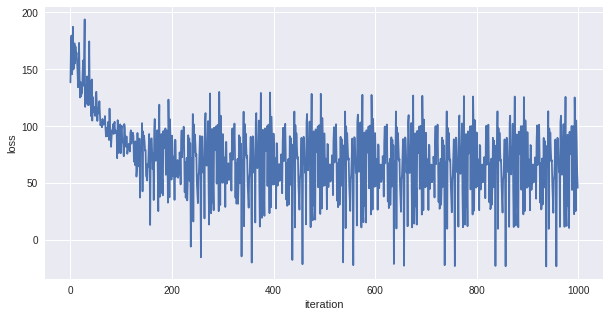

In [4]:
len_data = 1000
ix = DatasetIndex(np.arange(len_data))

dset = Dataset(ix,MyBatch)
sess = tf.Session()
sess.run(tf.global_variables_initializer())
loss = []
dict_params = {'w': np.zeros(1),
             'loss': np.zeros(1),
              'test': np.random.random(3).reshape(1, 3),
             'result': np.zeros(3, dtype=np.float32)}

lam = np.random.random(3)
x, y = generate(len_data, 'poisson', lam)
for batch in tqn(dset.gen_batch(batch_size=10, n_epochs=10)):
    batch.load((x, y)).train_poisson_model(sess, dict_params)
    loss.append(dict_params['loss'])

print('predict lam: {}\ntrue lam: {}'. format(np.exp(-np.array(dict_params['result']).reshape(-1)), lam))
plt.figure(figsize=(10, 5))
plt.plot(loss)
plt.xlabel('iteration')
plt.ylabel('loss')